Linear Sorting Algorithms 
===

Implementation of some  algorithms with linear complexity (O(n)) . The algorithms here implmented are: Counting Sort, Radix Sort (queue version) and Bucket sort. All this algorithms are compared with Timsort, that is the build in function in python for sorting.

The principal code are writed on C

Imports

In [1]:
import ctypes
import numpy as np
import time

Load the shared library into ctypes

In [2]:
clibrary = ctypes.CDLL('./clibrary.dll')

Counting Sort
======

#defining the function for random search (the function is defined in the c library)

In [3]:
def counting_sort(array):
    k_max=max(array)
    lenght=len(array)
    #define the type of data that requires the function in C
    clibrary.counting_sort.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int, ctypes.c_int,ctypes.POINTER(ctypes.c_int)]

    #convert the array to a pointer
    array = (ctypes.c_int * lenght)(*array)
    sorted_array = (ctypes.c_int * lenght)()

    #call the function in C
    clibrary.counting_sort(array, k_max,lenght,sorted_array)

    sorted_array = np.ctypeslib.as_array(sorted_array)
    return sorted_array

Radix Sort (Queue Version)
======

In [4]:
def queue_radix_sort(array):
    k_max=max(array)
    lenght=len(array)
    #define the type of data that requires the function in C
    clibrary.counting_sort.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int, ctypes.c_int,ctypes.POINTER(ctypes.c_int)]

    #convert the array to a pointer
    array = (ctypes.c_int * lenght)(*array)
    sorted_array = (ctypes.c_int * lenght)()

    #call the function in C
    #clibrary.radix_sort(array,k_max,lenght,sorted_array)
    clibrary.radix_sort(array, ctypes.c_int(k_max), ctypes.c_int(lenght), sorted_array)

    sorted_array = np.ctypeslib.as_array(sorted_array)
    return sorted_array

Bucket Sort
======

In [5]:
def bucket_sort(array):
    k_max=max(array)
    lenght=len(array)
    #define the type of data that requires the function in C
    clibrary.bucket_sort.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int, ctypes.c_int,ctypes.POINTER(ctypes.c_int)]


    #convert the array to a pointer
    array = (ctypes.c_int * lenght)(*array)
    sorted_array = (ctypes.c_int * lenght)()

    #call the function in C
    #clibrary.radix_sort(array,k_max,lenght,sorted_array)
    clibrary.bucket_sort(array, ctypes.c_int(k_max), ctypes.c_int(lenght), sorted_array)

    sorted_array = np.ctypeslib.as_array(sorted_array)
    return sorted_array

Testing the Algorithms
===

Generate a unsorted random array 

In [6]:
random_array = np.random.randint(1,200,15)
print('Unsorted array:',random_array)

Unsorted array: [151 157 122 182 126  22 193 157 183  64  81  11 199  92  40]


Sorting using different algorithms

In [7]:
sorted_array_counting=counting_sort(random_array)
sorted_array_radix=queue_radix_sort(random_array)
sorted_array_bucket=bucket_sort(random_array)
#using Timsort algorithm (this is the default algorithm for Python)
sorted_array_tim=sorted(random_array)

print('Counting sort:',sorted_array_counting)
print('Radix sort:',sorted_array_radix)
print('Bucket sort:',sorted_array_bucket)
print('Tim sort:',sorted_array_tim)



Counting sort: [ 11  22  40  64  81  92 122 126 151 157 157 182 183 193 199]
Radix sort: [ 11  22  40  64  81  92 122 126 151 157 157 182 183 193 199]
Bucket sort: [ 11  22  40  64  81  92 122 126 151 157 157 182 183 193 199]
Tim sort: [11, 22, 40, 64, 81, 92, 122, 126, 151, 157, 157, 182, 183, 193, 199]


Measure the time complexity
===

In [8]:
def time_complexity(max_size,step_size,mean_size,sorting_func):
    #create random arrays of diferent sizes where the number don't repeat
    time_per_size=[]
    for i in range(step_size,max_size,step_size):   #this loop is for arrays of diferent sizes
        tiempos=[]
        for j in range (mean_size): #this loop is for arrays of the same size, but different numbers that ten will be promediate their times
            array_aleatorio=np.random.choice(np.arange(0,i,1),i,replace=False)
            #define initial time
            random_num_to_search=np.random.randint(0,i,1)
            random_num_to_search=random_num_to_search[0]
            t1=time.time()
            index=sorting_func(array_aleatorio)
            #define final time
            t2=time.time()
            tiempos.append(t2-t1)
        #define the mean time of the same size arrays
        tiempo_promedio=np.mean(tiempos)
        time_per_size.append(tiempo_promedio)
    return time_per_size

Time Complexity Plot

In [9]:
#call the function time_complexity
array_max_size=5000
step_size=10
num_array2mean=5
time_per_size_counting=time_complexity(array_max_size,step_size,num_array2mean,counting_sort)
time_per_size_radix=time_complexity(array_max_size,step_size,num_array2mean,queue_radix_sort)
time_per_size_bucket=time_complexity(array_max_size,step_size,num_array2mean,bucket_sort)
time_per_size_tim=time_complexity(array_max_size,step_size,num_array2mean,sorted)

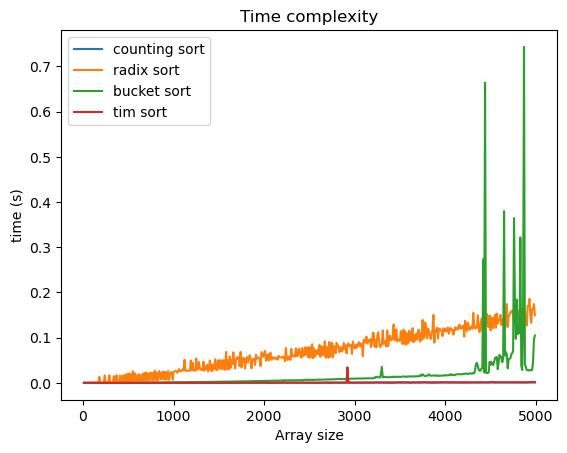

In [41]:
import matplotlib.pyplot as plt
size=np.arange(step_size,array_max_size,step_size)
plt.plot(size, time_per_size_counting, label='counting sort')
plt.plot(size, time_per_size_radix, label='radix sort')
plt.plot(size, time_per_size_bucket, label='bucket sort')
plt.plot(size, time_per_size_tim, label='tim sort')

#plt.axis([1000, array_max_size, 0, 0.01])

plt.ylabel('time (s)')
plt.xlabel('Array size')
plt.title('Time complexity')
plt.legend()
plt.show()

as we can see in the graph, all the algorithms have time complexity O(n), this is because the time grows linearly with the size of the array, but Tim sort and counting Sort are the winners, both are linear but with a lower slope, this means that with large arrays will work more faster thant the others.This happens because:

    1 Dependence on Data Range:
Radix Sort's efficiency heavily depends on the data range. If the range is large, it may require many iterations, making it less efficient compared to algorithms like Quicksort or Mergesort.

    2 Additional Space:
Both Radix Sort and Bucket Sort often require additional space to store buckets or auxiliary structures. This can be a drawback if memory availability is a concern.

    3 Non-Uniform Data Distribution:
If data is not uniformly distributed, buckets may end up with very few or many elements, affecting Bucket Sort's performance.

    4 Worst Case for Radix Sort:
Although Radix Sort has linear complexity, it can become less efficient in the worst case if base-10 representation is used (e.g., sorting integers). In this case, the complexity may seem higher, although it remains linear.

    5 Performance with Sparse Data:
In certain cases, comparison-based algorithms can perform better with sparse data or specific data patterns. Algorithms like Quicksort and Mergesort can handle diverse data types and distributions with consistent performance.

    6 Flexibility:
Comparison-based algorithms are generally more flexible and versatile as they can work with a wide variety of data types and do not require specific assumptions about data distribution.

Here we have only tim sort and counting sort, and we can see that both growth in a similar way.

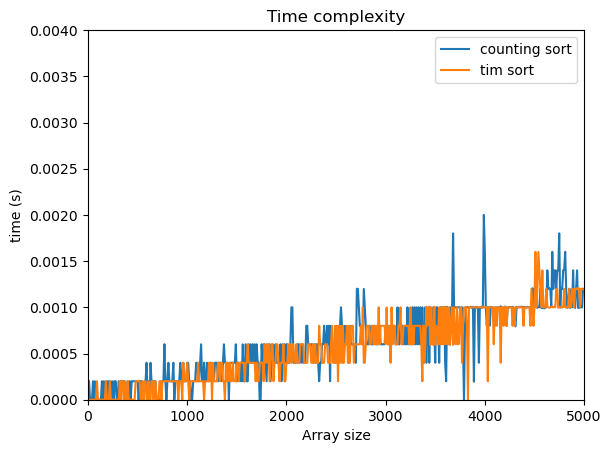

In [14]:
import matplotlib.pyplot as plt
size=np.arange(step_size,array_max_size,step_size)
plt.plot(size, time_per_size_counting, label='counting sort')
plt.plot(size, time_per_size_tim, label='tim sort')

plt.axis([0, array_max_size, 0, 0.004])

plt.ylabel('time (s)')
plt.xlabel('Array size')
plt.title('Time complexity')
plt.legend()
plt.show()

both are very similar...